In [1]:
import numpy as np
import numpy.linalg as la
import numpy.random as rand
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
from matplotlib import cm
# import timeit
from scipy.integrate import odeint
from scipy import stats
from sklearn.manifold import MDS
from matplotlib.ticker import FormatStrFormatter
import modelSystems as ms
from EDMtoolkit import *
from modelSystems import *

%matplotlib notebook
%load_ext autoreload
%autoreload 2

c:\users\kenneth gee\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
c:\users\kenneth gee\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org

In [2]:
nyears = 1

settlingTime = 2 ** 10
tlen = 2 ** 9
end = 2**9 # (3.498901098901099 / (12*reduction)) * tlen # 2**3
reduction = 2 ** 0
trainToTest = 0.80 # between 0 and 1

tr = np.linspace(0, end, num=tlen)
t = tr

# MAKE SURE TO UPDATE THE DIMENSION WHEN SWITCHING ATTRACTORS
dim = 3
ndrivers = 1

# t0 = np.array([0.34])
# t0 = np.ones(3) * 3# np.array([0,5,15])# np.ones(dim) * 0.3333 # np.array([0,5,15]) * 1 # np.zeros(dim)
# 
# t0 = np.ones(5)
# t0[0] += 0.1
# t0 = np.array([0,5,15])b

In [3]:
""" INITIAL CONDITIONS """
# x0 = np.array([3,250])
x0 = np.array([0.49])
#x0 = np.array([0.1,0.4,9])

# m = 50
# x0 = np.ones(m) * (np.pi ** -1)
# x0[0] += 0.2
# x0[1] += 0.3
# x0 = np.array([1,5,9],dtype=float)

""" DRIVERS """
# Gmax = lambda t: 0.7 # +0.5*t/tlen
r = lambda t: 4 - t / tlen# + 0.5 * np.sin(np.pi * t / tlen)
# m = lambda t: 0.3
# b1 = lambda t: 5 - 1.5 * np.cos(2*np.pi*t / end)
# b1 = lambda t: 4.5 # 2.5 + 4 * t / end
# c = lambda t: 2+2*t/256+np.sin(t)

""" GENERATE TS """
# Xr = ms.generateTimeSeriesContinuous('Lorenz', np.array([1,5,17]))
# Xr = generateTimeSeriesContinuous('RosslerP', np.array([1,1,1]), nsargs=(c,), end=256, tlen = 1024, reduction = 4)
# Xr = generateTimeSeriesContinuous("HastingsPowell", x0, tlen=tlen, end=end, reduction=reduction, settlingTime=settlingTime)
# Xr = standardize(generateTimeSeriesContinuous('HastingsPowellP', x0, nsargs=(b1,), end=end, tlen = tlen, reduction = reduction, settlingTime=settlingTime))[:,0,None]
# Xc = generateTimeSeriesDiscrete(DensityDependentMaturation, x0, settlingTime=30, tlen=tlen)
# Xc = generateTimeSeriesDiscrete(DensityDependentMaturationP, x0, settlingTime=30, tlen=tlen, nsargs=(Gmax,))
# Xr = Xc[:,1,None]
Xr = generateTimeSeriesDiscrete("LogisticP", x0, tlen=tlen, nsargs=(r,), settlingTime=settlingTime)
# Xr = generateTimeSeriesDiscrete("LogisticIslandsP", x0, nsargs=(r, m), tlen=tlen, settlingTime=settlingTime)[:,4,None]

In [6]:
"""
fig, ax = plt.subplots(1, figsize=(6,4))
ax.scatter(Xc[:,1], Xc[:,0])
ax.set_xlabel("Juveniles")
ax.set_ylabel("Adults")

# ax[1].plot(Xr[::5,1])
# ax[1].set_ylabel("Juveniles")
# ax[2].plot(Xr[::5,0])
# ax[2].set_ylabel("Adults")
plt.tight_layout()
plt.show()
"""

'\nfig, ax = plt.subplots(1, figsize=(6,4))\nax.scatter(Xc[:,1], Xc[:,0])\nax.set_xlabel("Juveniles")\nax.set_ylabel("Adults")\n\n# ax[1].plot(Xr[::5,1])\n# ax[1].set_ylabel("Juveniles")\n# ax[2].plot(Xr[::5,0])\n# ax[2].set_ylabel("Adults")\nplt.tight_layout()\nplt.show()\n'

In [8]:
# poincareT(Xc[:,1],xlabel="Juveniles(t)", ylabel="Juveniles(t-1)")

(-25.55, 536.55, -0.037017950494423524, 1.0419222503032997)

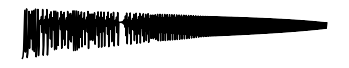

In [9]:
fig, ax = plt.subplots(1, figsize=(6,1))
ax.set_xticks([])
ax.set_yticks([])
ax.plot(Xr,c="black")
ax.axis("off")

In [14]:
X, Y = delayEmbed(Xr, 3, 1, 1)

x = X[-1]
weights = np.exp(-la.norm(X-x,axis=1)*0.5)

(-25.586735039699064, 537.3110460325269, -0.0232663766016062, 1.04431456421529)

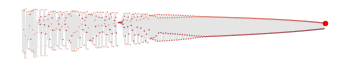

In [15]:
fig, ax = plt.subplots(1, figsize=(6,1))
ax.set_xticks([])
ax.set_yticks([])
ax.scatter(np.arange(Y.shape[0]),X[:,0],c=weights,s=0.1,cmap="Reds")
ax.scatter(Y.shape[0], Y[-1], c="red", s=20, marker="o")
ax.plot(Y,c="black", alpha=0.1)
ax.axis('off')

In [ ]:
pred_point = np.array([-1.75,-1.75])
pred_point_line = np.array([[-1.75,-1.75,-3],
                            [-1.75,-1.75, 1]])

norms = la.norm(Xn - pred_point,axis=1)
d = np.mean(norms)

weights = np.exp(-1*((thetaNS-3)*norms)/d)
W = np.diag(weights)

M = np.hstack([Xn, np.ones((Xn.shape[0],1))])
xaug = np.hstack([pred_point, 1])
xaug = np.reshape(xaug, (1,xaug.shape[0]))
C = la.pinv(W@M) @ W @ Yn

res = np.linspace(pred_point[0]-1,pred_point[0]+1,num=3)
Xm, Ym = np.meshgrid(res,res)
Zm = np.zeros((3,3))
for i in range(3):
    for j in range(3):
        Zm[i,j] = np.dot(C.flatten(),np.array([Xm[i,j],Ym[i,j],1]))

In [ ]:


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Xn[:,0],Xn[:,1],Yn,c=weights/np.ptp(weights),cmap="Reds",s=50)
ax.scatter(Xn[:,0],Xn[:,1],Yn,c='black',alpha=1,s=5)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlabel("x(t)")
ax.set_ylabel("x(t-1)")
ax.set_zlabel("x(t+1)")
ax.plot(pred_point_line[:,0],pred_point_line[:,1],pred_point_line[:,2],c="red")
ax.plot_surface(Xm, Ym, Zm, alpha=0.25,cmap=cm.autumn)